## Análise de ensaios de caracterização magnética de aços para fins elétricos

Esse notebook descreve as análises realizadas a partir da aplicação da técnica de planejamento de experimentos (Design of Experiments - DOE) em ensaios de caracterização magnética. O objetivo foi analisar o efeito de quatro fatores nas medições de perdas totais magnéticas e permeabilidade magnética: direção de laminação, equipamento de teste, frequência do ensaio e classe do aço.

O primeiro passo para realizar as análises é ler os dados dos ensaios realizados.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Salva os dados em um data frame e exclui colunas desnecessárias
df = pd.read_excel('Dados_TCC.xlsx', sheet_name='Página1')
df = df.drop(['StdOrder','RunOrder','CenterPt','Blocks'],axis=1)

Analisando o data frame, é possível ver os 4 fatores e as 6 variáveis resposta.

In [5]:
df.head()

,Direção de laminação,Equipamento de teste,Frequência,Classe do aço,"Perdas Totais 0,5T","Perdas Totais 1,0T","Perdas Totais 1,5T","Permeabilidade 0,5T","Permeabilidade 1,0T","Permeabilidade 1,5T"
0,Transversal,Epstein,50Hz,U450,0.764216,2.630147,6.465046,4771.051450,5526.146124,630.634533
1,Transversal,Epstein,10Hz,E170,0.083646,0.232365,0.469293,3951.397922,4088.188611,1179.579641
2,Transversal,SST,50Hz,E170,0.527970,1.590981,3.379449,3775.970047,4075.751922,1090.606879
3,Longitudinal,SST,50Hz,E170,0.346557,1.220861,2.719481,10313.357518,12091.234842,2454.666197
4,Longitudinal,SST,10Hz,U450,0.103082,0.322354,0.721716,6220.161759,5841.946697,1821.252977


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
Direção de laminação    48 non-null object
Equipamento de teste    48 non-null object
Frequência              48 non-null object
Classe do aço           48 non-null object
Perdas Totais 0,5T      48 non-null float64
Perdas Totais 1,0T      48 non-null float64
Perdas Totais 1,5T      48 non-null float64
Permeabilidade 0,5T     48 non-null float64
Permeabilidade 1,0T     48 non-null float64
Permeabilidade 1,5T     48 non-null float64
dtypes: float64(6), object(4)
memory usage: 3.8+ KB


Os fatores são variáveis categóricas que assumem dois valores possíveis, porém ainda falta convertê-los para esse tipo.

In [7]:
df['Direção de laminação'] = df['Direção de laminação'].astype('category')
df['Equipamento de teste'] = df['Equipamento de teste'].astype('category')
df['Frequência'] = df['Frequência'].astype('category')
df['Classe do aço'] = df['Classe do aço'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
Direção de laminação    48 non-null category
Equipamento de teste    48 non-null category
Frequência              48 non-null category
Classe do aço           48 non-null category
Perdas Totais 0,5T      48 non-null float64
Perdas Totais 1,0T      48 non-null float64
Perdas Totais 1,5T      48 non-null float64
Permeabilidade 0,5T     48 non-null float64
Permeabilidade 1,0T     48 non-null float64
Permeabilidade 1,5T     48 non-null float64
dtypes: category(4), float64(6)
memory usage: 2.9 KB


Para facilitar a análise, pode-se salvar os fatores e variáveis resposta como variáveis.

In [9]:
A = df['Direção de laminação']
B = df['Equipamento de teste']
C = df['Frequência']
D = df['Classe do aço']

perdas1 = df['Perdas Totais 0,5T']
perdas2 = df['Perdas Totais 1,0T']
perdas3 = df['Perdas Totais 1,5T']
permeabilidade1 = df['Permeabilidade 0,5T']
permeabilidade2 = df['Permeabilidade 1,0T']
permeabilidade3 = df['Permeabilidade 1,5T']

Os modelos serão estimados utilizando **statsmodel**, que possui diferentes modelos estatísticos. Nessas análises, será estimado um modelo por regressão linear e realizada a análise de variância (ANOVA) para identificar o efeito dos diferentes fatores nas variáveis resposta.

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

In [11]:
# Estimando primeiro modelo pra Perdas totais a 0,5 T
formula1 = 'perdas1 ~ A + B + C + D + A:B + A:C + A:D + B:C + B:D + C:D'
modelo1 = ols(formula1, df).fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                perdas1   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     815.3
Date:                Mon, 12 Aug 2019   Prob (F-statistic):           3.27e-40
Time:                        22:12:25   Log-Likelihood:                 120.58
No. Observations:                  48   AIC:                            -219.2
Df Residuals:                      37   BIC:                            -198.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.0304      0.011      2.845      0.007       0.009       0.052
A[T.Transversal]               0.0679      0.013      5.264      0.000       0.042       0.094
B[T.SST]                      -0.0013      0.013     -0.104      0.917      -0.027       0.025
C[T.50Hz]                      0.3567      0.013     27.643      0.000       0.331       0.383
D[T.U450]                      0.0923      0.013      7.152      0.000       0.066       0.118
A[T.Transversal]:B[T.SST]      0.0086      0.013      0.665      0.510      -0.018       0.035
A[T.Transversal]:C[T.50Hz]     0.0597      0.013      4.625      0.000       0.034       0.086
A[T.Transversal]:D[T.U450]    -0.1077      0.013     -8.344      0.000      -0.134      -0.082
B[T.SST]:C[T.50Hz]            -0.0015      0.013     -0.113      0.911      -0.028       0.025
B[T.SST]:D[T.U450]            -0.0047      0.013     -0.362      0.720      -0.031       0.021
C[T.50Hz]:D[T.U450]            0.2872      0.013     22.260      0.000       0.261       0.313
==============================================================================
Omnibus:                       57.000   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.032
Skew:                          -0.093   Prob(JB):                       0.0808
Kurtosis:                       1.425   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Resíduos do modelo para perdas totais a 0,5T')

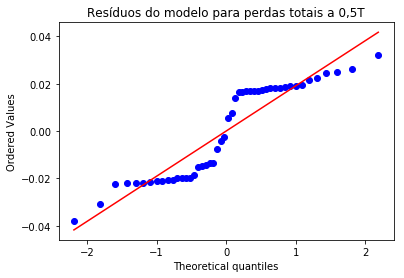

In [12]:
# Gráfico dos resíduos do modelo
fig1 = plt.figure(1)
stats.probplot(modelo1.resid, plot=plt)
plt.title('Resíduos do modelo para perdas totais a 0,5T')

O próximo passo seria realizar a ANOVA, porém ela assume que os resíduos do modelo seguem uma distribuição normal. Para verificar essa hipótese pode ser feito um teste de normalidade, como o Anderson-Darling.

In [13]:
test_ad1 = sms.normal_ad(modelo1.resid)
"AD: {}, p valor: {}".format(test_ad1[0],test_ad1[1])

C:\Users\marjo\Anaconda3\lib\site-packages\statsmodels\stats\_adnorm.py:66: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


'AD: 3.0243721014129505, p valor: 1.0354510835297693e-07'

O p-valor indica a probabilidade em se cometer um erro ao rejeitar a hipótese nula. Neste caso, a hipótese nula é a de que os resíduos apresentam uma distribuição normal. Como o p-valor foi menor que 5%, concluí-se que os resíduos não possuem aderência à distribuição normal. A partir disso, pode-se transformar os dados para uma melhor aderência dos resíduos à normalidade e aplicação da ANOVA.

É aplicada uma transformação Box-Cox nessa variável usando SciPy e estimado um novo modelo com a variável transformada.

In [16]:
import scipy.stats as stats
boxcox1 = stats.boxcox(perdas1)
lambda1 = round(boxcox1[1])
perdas1_bc = stats.boxcox(perdas1,lmbda=lambda1)
formula1_bc = 'perdas1_bc ~ A + B + C + D + A:B + A:C + A:D + B:C + B:D + C:D'
modelo1_bc = ols(formula1_bc, df).fit()
modelo1_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             perdas1_bc   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5049.
Date:                Mon, 12 Aug 2019   Prob (F-statistic):           7.99e-55
Time:                        22:13:05   Log-Likelihood:                 103.24
No. Observations:                  48   AIC:                            -184.5
Df Residuals:                      37   BIC:                            -163.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -3.0215      0.015   -196.766      0.000      -3.053      -2.990
A[T.Transversal]               0.5121      0.019     27.653      0.000       0.475       0.550
B[T.SST]                       0.0067      0.019      0.359      0.721      -0.031       0.044
C[T.50Hz]                      2.0018      0.019    108.089      0.000       1.964       2.039
D[T.U450]                      0.7160      0.019     38.663      0.000       0.679       0.754
A[T.Transversal]:B[T.SST]      0.0139      0.019      0.751      0.457      -0.024       0.051
A[T.Transversal]:C[T.50Hz]    -0.1030      0.019     -5.561      0.000      -0.141      -0.065
A[T.Transversal]:D[T.U450]    -0.4705      0.019    -25.405      0.000      -0.508      -0.433
B[T.SST]:C[T.50Hz]            -0.0086      0.019     -0.466      0.644      -0.046       0.029
B[T.SST]:D[T.U450]            -0.0103      0.019     -0.555      0.582      -0.048       0.027
C[T.50Hz]:D[T.U450]            0.0821      0.019      4.431      0.000       0.045       0.120
==============================================================================
Omnibus:                        0.111   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.268
Skew:                          -0.095   Prob(JB):                        0.874
Kurtosis:                       2.686   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
res1_bc = modelo1_bc.resid
test1_bc = sms.normal_ad(res1_bc)
"AD: {}, p valor: {}".format(test1_bc[0],test1_bc[1])

'AD: 0.7056920256859343, p valor: 0.061273541712841065'

Text(0.5, 1.0, 'Resíduos do modelo da variável transformada para perdas totais a 0,5T')

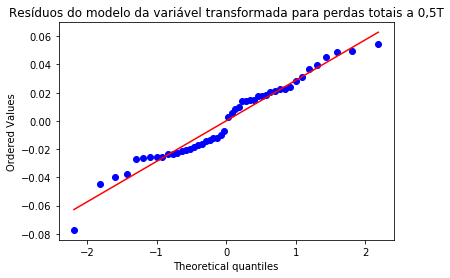

In [18]:
fig2 = plt.figure(2)
stats.probplot(modelo1_bc.resid, plot=plt)
plt.title('Resíduos do modelo da variável transformada para perdas totais a 0,5T')

Analisando os resíduos, é possível ver que após a transformação da variável, apresentam aderência à distribuição normal.

Aplicando a ANOVA:

In [19]:
anova = sm.stats.anova_lm(modelo1_bc)
pvalues = anova['PR(>F)']
anova

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,0.647785,0.647785,629.540777,7.899360e-25
B,1.0,0.000207,0.000207,0.201652,6.560098e-01
C,1.0,47.379584,47.379584,46045.208200,7.102918e-59
D,1.0,3.203565,3.203565,3113.341147,2.567172e-37
A:B,1.0,0.000581,0.000581,0.564223,4.573148e-01
A:C,1.0,0.031824,0.031824,30.927688,2.466888e-06
A:D,1.0,0.664121,0.664121,645.417382,5.107155e-25
B:C,1.0,0.000223,0.000223,0.217145,6.439555e-01
B:D,1.0,0.000317,0.000317,0.307920,5.822989e-01
C:D,1.0,0.020200,0.020200,19.631034,8.057216e-05


Para analisar a significância dos fatores do modelo faz-se a análise dos p-valores.

In [20]:
pvalues

A           7.899360e-25
B           6.560098e-01
C           7.102918e-59
D           2.567172e-37
A:B         4.573148e-01
A:C         2.466888e-06
A:D         5.107155e-25
B:C         6.439555e-01
B:D         5.822989e-01
C:D         8.057216e-05
Residual             NaN
Name: PR(>F), dtype: float64

Os fatores significativos são os que apresentam um p-valor menor que 5%. Isso porque na ANOVA, a hipótese nula é de que todas as médias são iguais. Portanto, um valor p menor que 5% nos leva a rejeitar a hipótese nula e concluir que há alguma associação entre o termo do modelo e a resposta. 

In [21]:
sig_factor = pvalues.loc[pvalues < 0.05]
sig_factor

A      7.899360e-25
C      7.102918e-59
D      2.567172e-37
A:C    2.466888e-06
A:D    5.107155e-25
C:D    8.057216e-05
Name: PR(>F), dtype: float64

Neste caso, os fatores significativos são a direção de laminação, frequência e classe do aço, além da interação entre direção de laminação com frequência e com classe do aço, e da frequência com classo do aço. Pode-se plotar um gráfico do efeito dos fatores e interações para observar suas amplitudes.

In [29]:
n_coef1 = ["A", "B", "C", "D", "AB", "AC", "AD", "BC", "BD", "CD"]
coef1 = modelo1_bc.params
coef1 = coef1.drop(labels=['Intercept'])

coef1_values = coef1.values
coef1_names = coef1.index
coef1_s = coef1.sort_values()

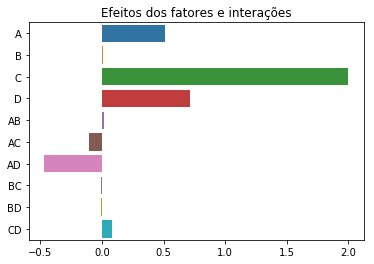

In [28]:
fig3 = plt.figure(3)
plt.title('Efeitos dos fatores e interações')
sns.barplot(x=coef1_values,y=n_coef1,data=df)

Portanto, para as perdas totais a 0,5 T os fatores significativos foram direção de laminação, frequência, classe do aço e a interação entre direção de laminação com frequência e com classe do aço, e da frequência com classo do aço. O efeito com maior influência na resposta é a frequência, possuindo um efeito positivo. O efeito positivo faz com que uma mudança do nível baixo para o nível alto resulte em um aumento na variável resposta. Neste caso, o nível baixo era 10Hz e o nível alto era 50Hz. A classe do aço e a direção de corte também são fatores com efeitos positivos nas perdas totais a 0,5 T.

O mesmo procedimento de análise pode ser aplicado para as outras 5 variáveis resposta.